In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


In [51]:
train.describe()
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
train['Sex'] = train['Sex'].apply(lambda x:1 if x=='female' else 0)
test['Sex'] = test['Sex'].apply(lambda x:1 if x=='female' else 0)

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Count plot - Survived')

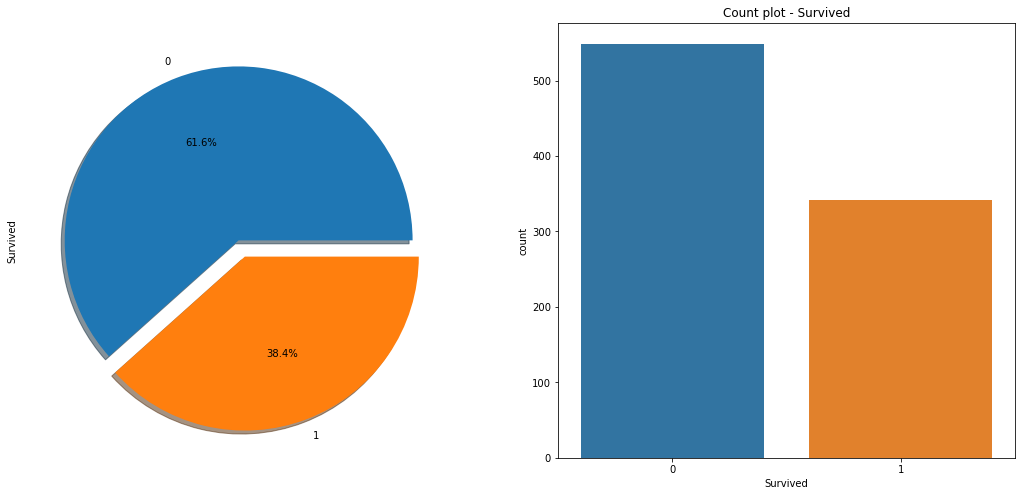

In [54]:
f, ax = plt.subplots(1,2, figsize = (18, 8))

train.Survived.value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

In [55]:
train['Embarked_C'] = train['Embarked'].apply(lambda x:True if x=='C' else False)
train['Embarked_S'] = train['Embarked'].apply(lambda x:True if x=='S' else False)
train['Embarked_Q'] = train['Embarked'].apply(lambda x:True if x=='Q' else False)


In [58]:
test['Embarked_C'] = test['Embarked'].apply(lambda x:True if x=='C' else False)
test['Embarked_S'] = test['Embarked'].apply(lambda x:True if x=='S' else False)
test['Embarked_Q'] = test['Embarked'].apply(lambda x:True if x=='Q' else False)

In [13]:
def myData(data, cols):
    # print(data[col])
    for col in cols:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)] ,axis=1)
        data = data.drop(col, axis = 1)
    return data

In [56]:
cols = ['Pclass']
train = myData(train, cols)
test = myData(test, cols)

In [57]:
train['Age_mean'] = train['Age']
train['Age_mean'].isnull().sum()
train['Age_mean'].fillna(train['Age'].mean(), inplace = True)
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Age_mean         0
dtype: int64

In [59]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace = True)

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Pclass_1     418 non-null    uint8  
 11  Pclass_2     418 non-null    uint8  
 12  Pclass_3     418 non-null    uint8  
 13  Embarked_C   418 non-null    bool   
 14  Embarked_S   418 non-null    bool   
 15  Embarked_Q   418 non-null    bool   
 16  Age_mean     418 non-null    float64
dtypes: bool(3), float64(3), int64(4), object(4), uint8(3)
memory usage: 38.5+ KB


In [61]:
train['FamilySize'] = train['SibSp']+train['Parch']+1

train['Family']=train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] ='S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize']<5), 'Family'] ='M'
train.loc[train['FamilySize']>5, 'Family'] ='L'

train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [62]:
test['FamilySize'] = test['SibSp']+test['Parch']+1
test['Family']=test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] ='S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize']<5), 'Family'] ='M'
test.loc[test['FamilySize']>5, 'Family'] ='L'

test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [28]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [112]:
train['newFare']=train['Fare']
train.loc[train['Fare'] == 15, 'newFare'] ='L'
train.loc[(train['Fare'] > 15) & (train['Fare']<31), 'newFare'] ='M'
train.loc[train['Fare'] >= 31, 'newFare'] ='H'

train['Fare_L'] = train['newFare'] == 'L'
train['Fare_M'] = train['newFare'] == 'M'
train['Fare_H'] = train['newFare'] == 'H'

In [113]:
test['newFare']=test['Fare']
test.loc[test['Fare'] == 14, 'newFare'] ='L'
test.loc[(test['Fare'] > 14) & (test['Fare']<31), 'newFare'] ='M'
test.loc[test['Fare'] >= 31, 'newFare'] ='H'

test['Fare_L'] = test['newFare'] == 'L'
test['Fare_M'] = test['newFare'] == 'M'
test['Fare_H'] = test['newFare'] == 'H'

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
fn = ['Sex','Age_mean', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_1', 'Pclass_2', 'Pclass_3','Fare_L','Fare_M','Fare_H']
xTrain = train[fn]
xTrain.head()
yLabel = train['Survived']

In [115]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 2020)
model

DecisionTreeClassifier(max_depth=5, random_state=2020)

In [116]:
model.fit(xTrain, yLabel)


DecisionTreeClassifier(max_depth=5, random_state=2020)

In [117]:
from sklearn.model_selection import KFold, cross_val_score

In [118]:
xTest = test[fn]
xTest

,Sex,Age_mean,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Fare_L,Fare_M,Fare_H
0,0,34.50000,False,False,True,0,0,1,False,False,False
1,1,47.00000,False,True,False,0,0,1,False,False,False
2,0,62.00000,False,False,True,0,1,0,False,False,False
3,0,27.00000,False,True,False,0,0,1,False,False,False
4,1,22.00000,False,True,False,0,0,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.27259,False,True,False,0,0,1,False,False,False
414,1,39.00000,True,False,False,1,0,0,False,False,True
415,0,38.50000,False,True,False,0,0,1,False,False,False
416,0,30.27259,False,True,False,0,0,1,False,False,False


In [119]:
prediction = model.predict(xTest)
prediction.shape
prediction
test['Survived'] = prediction

In [120]:
res = test[['PassengerId', 'Survived']]
res
res.to_csv('titanic_res.csv', index = False)

In [121]:
train.describe()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Age_mean,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.352413,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,29.699118,1.904602
std,257.353842,0.486592,0.477990,14.526497,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,13.002015,1.613459
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,1.000000
25%,223.500000,0.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,22.000000,1.000000
50%,446.000000,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,29.699118,1.000000
75%,668.500000,1.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,35.000000,2.000000
max,891.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,80.000000,11.000000
